In [1]:
import torch

## Basic tensor operations

In [2]:
torch.tensor([[1,2], [3,4]])

tensor([[1, 2],
        [3, 4]])

In [3]:
a = torch.tensor([[1,2],[3,4],[4,5]], dtype=torch.float)
a

tensor([[1., 2.],
        [3., 4.],
        [4., 5.]])

In [4]:
a.dtype

torch.float32

In [5]:
a.ndim

2

In [6]:
b = torch.rand(3,2)
b

tensor([[0.8323, 0.2306],
        [0.3138, 0.7184],
        [0.1399, 0.6195]])

In [7]:
print(b[0,1])

tensor(0.2306)


In [8]:
print(b[:,1])

tensor([0.2306, 0.7184, 0.6195])


In [9]:
e = torch.ones(2,3)
f = torch.zeros(2,3)

e, f

(tensor([[1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[0., 0., 0.],
         [0., 0., 0.]]))

In [10]:
torch.rand_like(a)

tensor([[0.1245, 0.5158],
        [0.8957, 0.3128],
        [0.1306, 0.8860]])

In [16]:
z= torch.rand(3,2,3,5)

In [17]:
z

tensor([[[[0.1670, 0.0108, 0.2460, 0.5340, 0.5333],
          [0.3266, 0.1077, 0.7871, 0.4797, 0.5911],
          [0.7527, 0.8231, 0.8182, 0.5889, 0.9825]],

         [[0.5847, 0.8545, 0.5370, 0.9809, 0.5816],
          [0.5502, 0.1802, 0.3692, 0.5768, 0.0575],
          [0.9149, 0.9337, 0.8610, 0.3490, 0.0012]]],


        [[[0.8168, 0.9635, 0.8206, 0.0799, 0.4205],
          [0.2866, 0.5079, 0.1478, 0.9994, 0.9285],
          [0.6010, 0.1094, 0.9879, 0.1990, 0.6127]],

         [[0.8896, 0.2483, 0.8561, 0.6977, 0.5952],
          [0.8730, 0.9101, 0.9883, 0.9074, 0.0606],
          [0.6540, 0.7647, 0.8359, 0.2220, 0.3640]]],


        [[[0.2476, 0.0062, 0.1289, 0.5953, 0.0849],
          [0.5976, 0.7818, 0.4105, 0.5008, 0.2702],
          [0.4732, 0.1323, 0.2323, 0.1563, 0.7246]],

         [[0.6708, 0.8504, 0.4519, 0.9423, 0.5582],
          [0.5343, 0.8261, 0.2524, 0.3710, 0.6241],
          [0.4616, 0.2479, 0.0338, 0.2548, 0.0041]]]])

In [18]:
z.ndim

4

In [19]:
torch.ones_like(a)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [20]:
torch.zeros_like(a)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

In [21]:
e.t()

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [22]:
e.sum()

tensor(6.)

In [24]:
e.size(), e.ndim

(torch.Size([2, 3]), 2)

In [25]:
e.t().add(torch.rand_like(a))

tensor([[1.5664, 1.4737],
        [1.5342, 1.7484],
        [1.0773, 1.9953]])

In [26]:
import numpy as np

In [27]:
c = b.numpy()

In [28]:
c

array([[0.8323099 , 0.23062587],
       [0.31381303, 0.7184022 ],
       [0.13991421, 0.61952716]], dtype=float32)

In [29]:
type(c)

numpy.ndarray

In [30]:
d = torch.from_numpy(c)

In [31]:
type(d)

torch.Tensor

In [32]:
g = torch.zeros(2,1)

In [33]:
g

tensor([[0.],
        [0.]])

In [34]:
h = g.numpy()

In [35]:
h

array([[0.],
       [0.]], dtype=float32)

In [36]:
g.add_(4)

tensor([[4.],
        [4.]])

In [37]:
g

tensor([[4.],
        [4.]])

In [38]:
h

array([[4.],
       [4.]], dtype=float32)

In [39]:
torch.cuda.is_available()

False

## Transforms

In [40]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [41]:
trfs = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

In [42]:
trfs

Compose(
    ToTensor()
    Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
)

In [43]:
train_ds = datasets.CIFAR10(root='./CIFAR10', train=True, download=True, transform=trfs)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./CIFAR10/cifar-10-python.tar.gz to ./CIFAR10


In [44]:
train_ds

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./CIFAR10
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           )

In [45]:
train_dl = DataLoader(train_ds, batch_size=4, shuffle=False, num_workers=12)

In [46]:
a = next(iter(train_dl))

In [47]:
a[0], a[1]

(tensor([[[[-1.1075, -1.3815, -1.2617,  ...,  0.5878,  0.4851,  0.4166],
           [-1.8439, -2.1179, -1.8097,  ..., -0.0116, -0.0801, -0.0287],
           [-1.6898, -1.8439, -1.2788,  ..., -0.0972, -0.0629, -0.2513],
           ...,
           [ 1.4440,  1.3242,  1.2728,  ...,  0.6221, -1.1589, -1.2103],
           [ 0.9646,  0.8447,  1.0673,  ...,  1.0331, -0.4568, -0.6965],
           [ 0.9132,  0.7591,  0.9474,  ...,  1.5810,  0.4679, -0.0116]],
 
          [[-0.9503, -1.2304, -1.1954,  ...,  0.2752,  0.1527,  0.1352],
           [-1.6856, -2.0357, -1.8957,  ..., -0.4951, -0.5826, -0.5126],
           [-1.6155, -1.9132, -1.5630,  ..., -0.5651, -0.5651, -0.7577],
           ...,
           [ 0.9405,  0.6429,  0.7829,  ...,  0.2927, -1.4930, -1.4405],
           [ 0.3978,  0.1176,  0.4853,  ...,  0.5553, -0.9503, -1.1078],
           [ 0.4853,  0.2227,  0.4503,  ...,  1.1856,  0.0301, -0.4251]],
 
          [[-0.7064, -1.0201, -1.0550,  ...,  0.0779, -0.0267, -0.0092],
           [-

In [48]:
a[0][0].size()

torch.Size([3, 32, 32])

In [49]:
a[1][0].size()

torch.Size([])

In [50]:
img = a[0][2]

In [51]:
img.size()

torch.Size([3, 32, 32])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


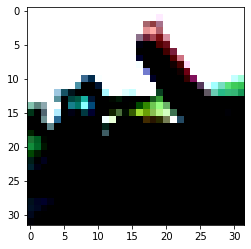

In [52]:
import matplotlib.pyplot as plt
img = img.permute(1,2,0)
plt.imshow(img)

In [53]:
trfs = transforms.Compose([transforms.ToTensor()])

In [54]:
train_ds = datasets.CIFAR10(root='./CIFAR10', train=True, download=True, transform=trfs)
train_dl = DataLoader(train_ds, batch_size=4, shuffle=False, num_workers=12)

Files already downloaded and verified


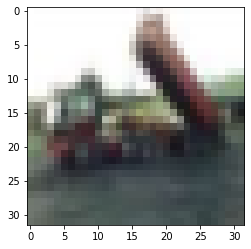

In [55]:
a = next(iter(train_dl))
img = a[0][2]
img = img.permute(1,2,0)
plt.imshow(img)